In [1]:
import xarray as xr

In [2]:
ds = xr.open_dataset('./tmp.grib2', engine='cfgrib',
                backend_kwargs={'indexpath':''})
ds

<xarray.Dataset>
Dimensions:     (x: 1799, y: 1059)
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    surface     float64 ...
    latitude    (y, x) float64 ...
    longitude   (y, x) float64 ...
    valid_time  datetime64[ns] ...
Dimensions without coordinates: x, y
Data variables:
    t           (y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP 
    history:                 2021-05-13T14:49 GRIB to CDM+CF via cfgrib-0.9.9...

(array([4.57000e+02, 6.91200e+03, 1.03964e+05, 3.02463e+05, 4.71168e+05,
        3.77466e+05, 3.08149e+05, 2.64471e+05, 6.09780e+04, 9.11300e+03]),
 array([263.81607, 268.75357, 273.69107, 278.62857, 283.56607, 288.50357,
        293.44107, 298.37857, 303.31607, 308.25357, 313.19107],
       dtype=float32),
 <BarContainer object of 10 artists>)

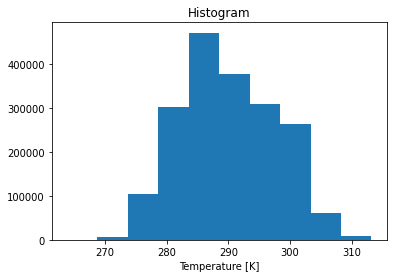

In [3]:
ds.t.plot.hist()

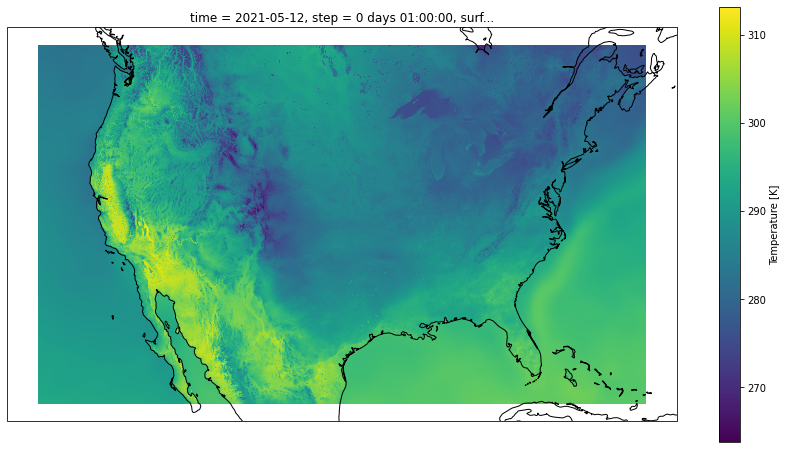

In [16]:
attrs = ds.t.attrs

prj_kwargs = dict(
    globe=ccrs.Globe(ellipse='sphere'),
    central_latitude=attrs['GRIB_LaDInDegrees'],
    central_longitude=attrs['GRIB_LoVInDegrees'],
    standard_parallels=(attrs['GRIB_Latin1InDegrees'],\
                        attrs['GRIB_Latin2InDegrees'])
)
prj = ccrs.LambertConformal(**lc_kwargs)

fig = plt.figure(figsize=(15,8))
ax = plt.axes(projection=prj)
ds.t.plot(x='longitude', y='latitude', 
          ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()
